Now we will create a train test split and perform some EDA

# Train Test Split

In [1]:
import pandas as pd
import numpy as np

In [2]:
#we will initially work with the non-imputed, smaller data set
coffee_df = pd.read_csv('../data/coffee_dropnan.csv')

In [3]:
coffee = coffee_df.copy()

In [4]:
coffee.head()

,Country_of_Origin,Processing_Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean_Cup,Sweetness,Cupper_Points,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Ethiopia,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,1950.0,2200.0,2075.0
1,Ethiopia,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,1950.0,2200.0,2075.0
2,Guatemala,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,1600.0,1800.0,1700.0
3,Ethiopia,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,1800.0,2200.0,2000.0
4,Ethiopia,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,1950.0,2200.0,2075.0


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
coffee.Country_of_Origin.value_counts()

Mexico                          232
Guatemala                       156
Colombia                        150
Brazil                          105
Taiwan                           70
Honduras                         51
Costa Rica                       46
Tanzania, United Republic Of     37
Ethiopia                         30
Uganda                           24
Kenya                            23
Thailand                         20
El Salvador                      19
Indonesia                        18
Nicaragua                        18
China                            16
Malawi                           11
Name: Country_of_Origin, dtype: int64

In [7]:
## Make the split
coffee_train, coffee_test = train_test_split(coffee.copy(),
                                            shuffle=True,
                                            random_state=47,
                                            stratify=coffee['Country_of_Origin'])

In [8]:
coffee_test.Country_of_Origin.value_counts()

Mexico                          58
Guatemala                       39
Colombia                        38
Brazil                          26
Taiwan                          18
Honduras                        13
Costa Rica                      12
Tanzania, United Republic Of     9
Ethiopia                         7
Kenya                            6
Uganda                           6
El Salvador                      5
Thailand                         5
Nicaragua                        4
China                            4
Indonesia                        4
Malawi                           3
Name: Country_of_Origin, dtype: int64

In [10]:
#import some additional packages for plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

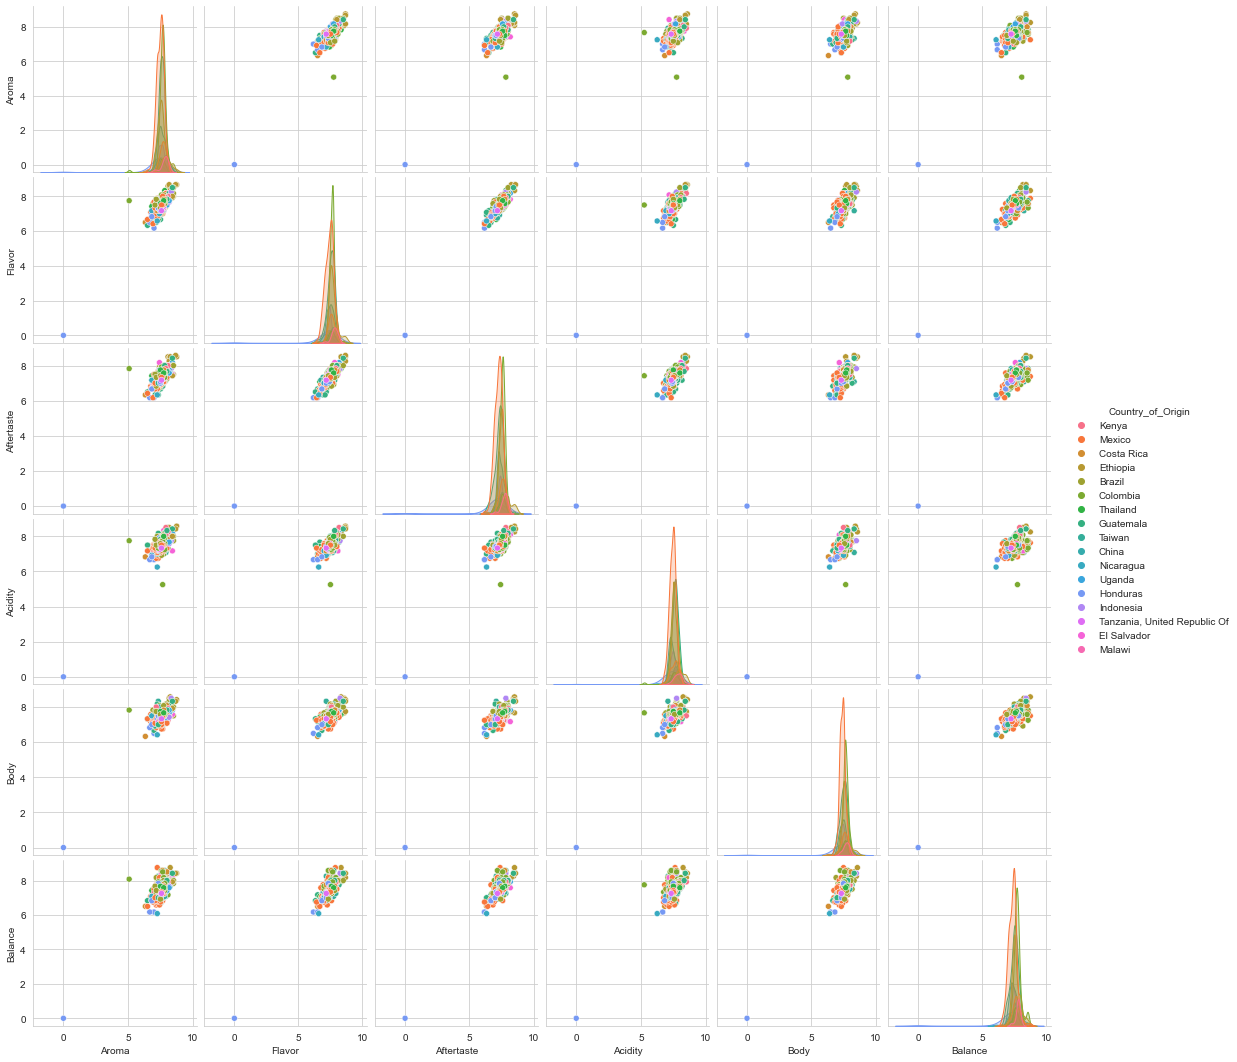

In [24]:
#make an initial pairplot to look at relationships between ratings and how they relate to the country of origin
sns.pairplot(coffee_train, vars = ["Aroma", "Flavor", "Aftertaste", "Acidity", "Body", "Balance"],  hue = "Country_of_Origin")

Here we see that the ratings generally have a positive trend when looking pairwise. It also becomes obvious that we have one outlier in the training data set with ratings of 0.

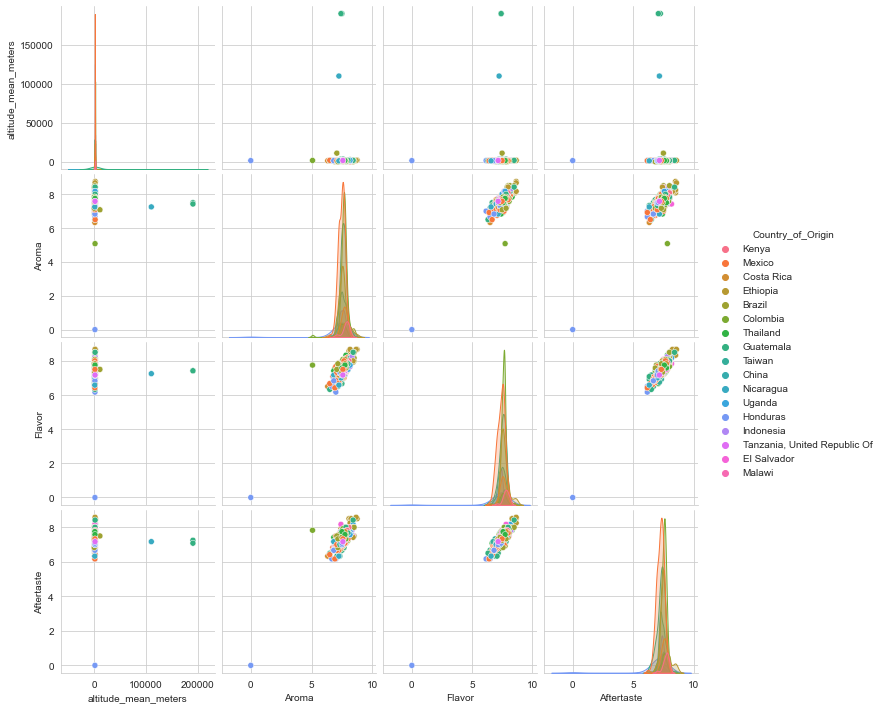

In [25]:
#Do the ratings have any obvious relationship to altitude?
sns.pairplot(coffee_train, vars = ["altitude_mean_meters", "Aroma", "Flavor", "Aftertaste"],  hue = "Country_of_Origin")

Again we see the rating outlier, but we now also see that a few samples have much higher mean altitudes which is obscuring the relationships.